In [43]:
import statsmodels.api as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df  = pd.read_csv("E:/Practice work 1/Introduction to Machine Learning and Deep Learning in Python\Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv", header = 0)

In [9]:
X = sn.add_constant(df["room_num"])

In [10]:
lm = sn.OLS(df["price"], X).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.31e-74
Time:                        15:34:50   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can also use SK Learn Library to fit our linear regression model, which is the most common way of using linear regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
y = df["price"]
X = df[["room_num"]]

In [14]:
lm2 = LinearRegression()

In [15]:
lm2.fit(X, y)

LinearRegression()

In [16]:
print(lm2.intercept_, lm2.coef_)

-34.65924312309723 [9.09966966]


In [ ]:
lm2.predict(X)

In [23]:
import seaborn as sns

C:\Users\Decent computer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Decent computer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


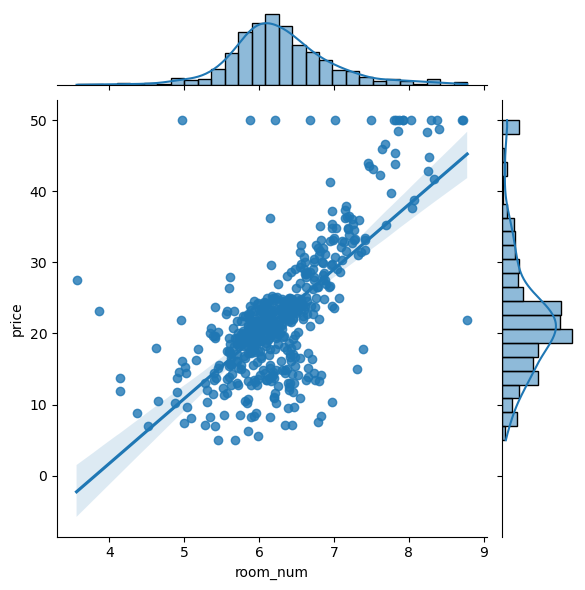

In [25]:
sns.jointplot(x = df["room_num"], y = df["price"], data=df, kind="reg")

## Multiple Linear Regression

In [29]:
X_multi = df.drop("price", axis = 1)
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [31]:
y_multi = df["price"]
print(y_multi)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: price, Length: 506, dtype: float64


In [45]:
X_multi_cons = sn.add_constant(X_multi)
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,1.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,1.0,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,1.0,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,1.0,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,1.0,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [53]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [39]:
ln_multi.summary()

NameError: name 'ln_multi' is not defined